# ARIMA :- Auto-Regressive Integrated Moving Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
plt.style.use('bmh')

# Step 1: Visualize Tractor sales data as time series

In [2]:


#url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
# s=requests.get(url)

sales_data = pd.read_csv("Tractor-Sales.csv")



In [3]:
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
# accesing directly from the url

from io import StringIO
import requests

url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
s =requests.get(url).text


In [5]:
ss=StringIO(s)

In [6]:
sales_data2=pd.read_csv(ss)

In [7]:
sales_data2.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [8]:
# since the complete date was not mentioned, we assume that it is first of every month
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(sales_data))

In [9]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [10]:
import calendar
sales_data['Month-Year'].head()

0    Jan-03
1    Feb-03
2    Mar-03
3    Apr-03
4    May-03
Name: Month-Year, dtype: object

In [11]:

dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [12]:
dates.week

Int64Index([ 1,  5,  9, 14, 18, 22, 27, 31, 36, 40,
            ...
             9, 14, 18, 22, 27, 31, 36, 40, 44, 49],
           dtype='int64', length=144)

In [13]:
# create new columns by name 'Month' and 'Year'
sales_data['Month']= dates.month

In [14]:
sales_data['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [15]:
sales_data['Year']=dates.year

In [16]:
sales_data['Year'].head()

0    2003
1    2003
2    2003
3    2003
4    2003
Name: Year, dtype: int64

In [17]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [18]:
# change months:1,2,3... with the Month abbreviation
calendar.month_abbr[1]

'Jan'

In [19]:
calendar.month_abbr[2]

'Feb'

In [20]:
sales_data['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [21]:
sales_data['Month']=sales_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
sales_data['Month'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Month, dtype: object

In [23]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [24]:
# now it is good to remove the month-year column,,,as well as rename 'Number of tractor sold' to 'Tractor-sales'
sales_data.drop(['Month-Year'],axis=1,inplace=True)

#df.rename(index=str, columns={"A": "a", "B": "c"})

sales_data.rename(columns={'Number of Tractor Sold':'Tractor-sales'},inplace=True)

In [25]:
sales_data.head(10)

,Tractor-sales,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003
5,189,Jun,2003
6,207,Jul,2003
7,207,Aug,2003
8,171,Sep,2003
9,150,Oct,2003


In [26]:
# arrange the columns as given earlier
sales_data=sales_data[['Month','Year','Tractor-sales']]

In [27]:
sales_data.head()

,Month,Year,Tractor-sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [28]:
sales_data.index 

RangeIndex(start=0, stop=144, step=1)

In [29]:
sales_data.set_index(dates,inplace=True)

In [30]:
sales_data.head(10)

,Month,Year,Tractor-sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203
2003-06-01,Jun,2003,189
2003-07-01,Jul,2003,207
2003-08-01,Aug,2003,207
2003-09-01,Sep,2003,171
2003-10-01,Oct,2003,150


In [31]:
sales_ts=sales_data['Tractor-sales']

In [32]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-sales, dtype: int64

In [33]:
'''  ## ----if this error shows up ----
C:\Users\SonyTF\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 39-40: truncated \UXXXXXXXX escape (<ipython-input-33-d3f2220ff0e4>, line 8)

C:\Users\SonyTF\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


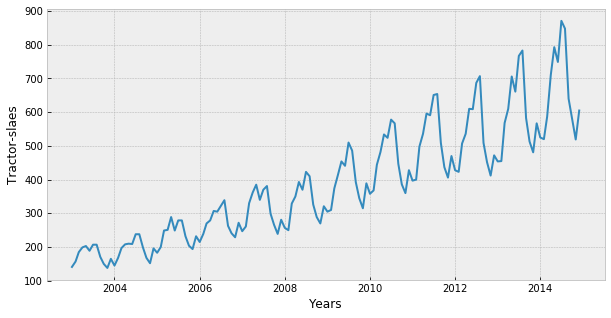

In [34]:

plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor-slaes')
plt.show()

In [35]:
# Time series decomposition : trend , seasonality , cylce, irregular remainder for tractor sales

# to decipher trends in the above tractor sales time series, we use Rolling statistics, Dickey-Fuller test

#-------------------------------
# plotting Rolling statistics : plot the moving average or moving variance and see if it varies with time
# at any time 't' , we will take the average/variance of the last year., last 12 months (its a visual technique)

#-------------
# Dickey-Fuller Test : this is one of the statistical test for checking stationarity.
# Null-Hypothesis is that the Time Series is non-stationary. The test results comprise of a Test Statistic and some 
# critical values for difference confidence levels.
# if the test statistic is less than the 'Critical Value', we can reject the null hypothesis and say that the 
# Time seris is stationary


In [36]:
#  Moving Average : the idea is to remove all the zigzag motions (wrinkle like curves) from the time series to produce
#  a steady trend through averaging values of a time period

# Moving Avg = [Sigma(i=-m to m)Yt+i]/2m


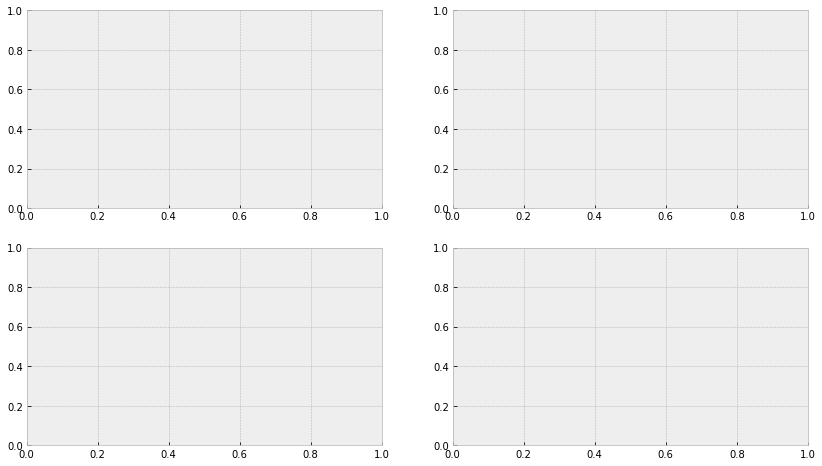

In [45]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

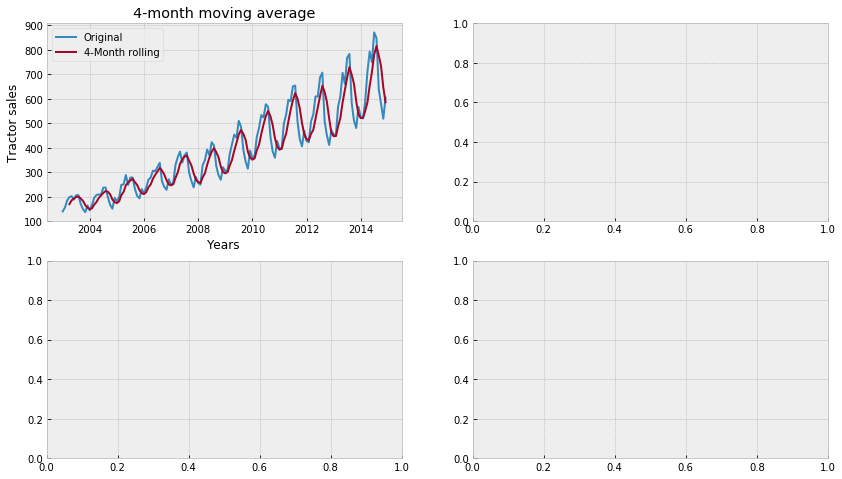

In [46]:
fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index,sales_ts,label='Original')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-Month rolling')

axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Tractor sales')
axes[0][0].set_title('4-month moving average')
axes[0][0].legend(loc='best')

plt.show()


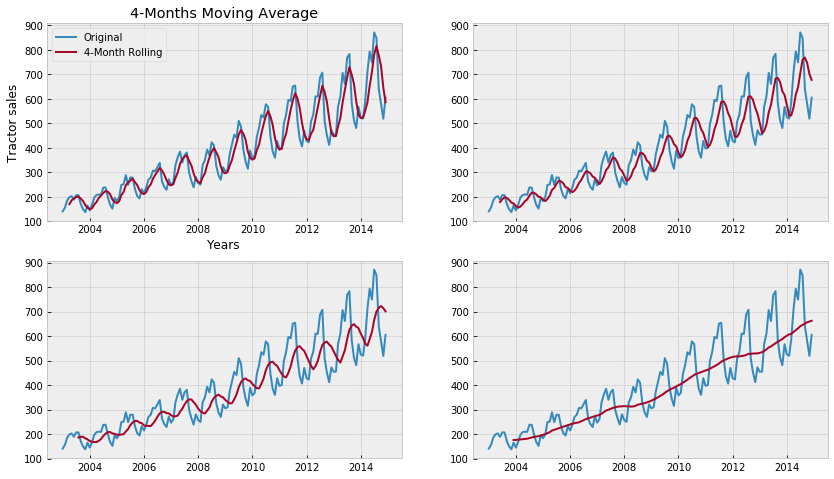

In [47]:
fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index,sales_ts,label='Original')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-Month Rolling')

axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Tractor sales')
axes[0][0].set_title('4-Months Moving Average')
axes[0][0].legend(loc='best')


##----##

axes[0][1].plot(sales_ts.index,sales_ts,label='Original')
axes[0][1].plot(sales_ts.index,sales_ts.rolling(window=6).mean(),label='6-month Rolling')

axes[0][1]
axes[0][1]
axes[0][1]
axes[0][1]


##----##

axes[1][0].plot(sales_ts.index,sales_ts,label='Original')
axes[1][0].plot(sales_ts.index,sales_ts.rolling(window=8).mean(),label='8-month Rolling')

axes[1][0]
axes[1][0]
axes[1][0]
axes[1][0]

##----##

axes[1][1].plot(sales_ts.index,sales_ts,label='Original')
axes[1][1].plot(sales_ts.index,sales_ts.rolling(window=12).mean(),label='12-month Rolling')

axes[1][1]
axes[1][1]
axes[1][1]
axes[1][1]

##----##

plt.show()


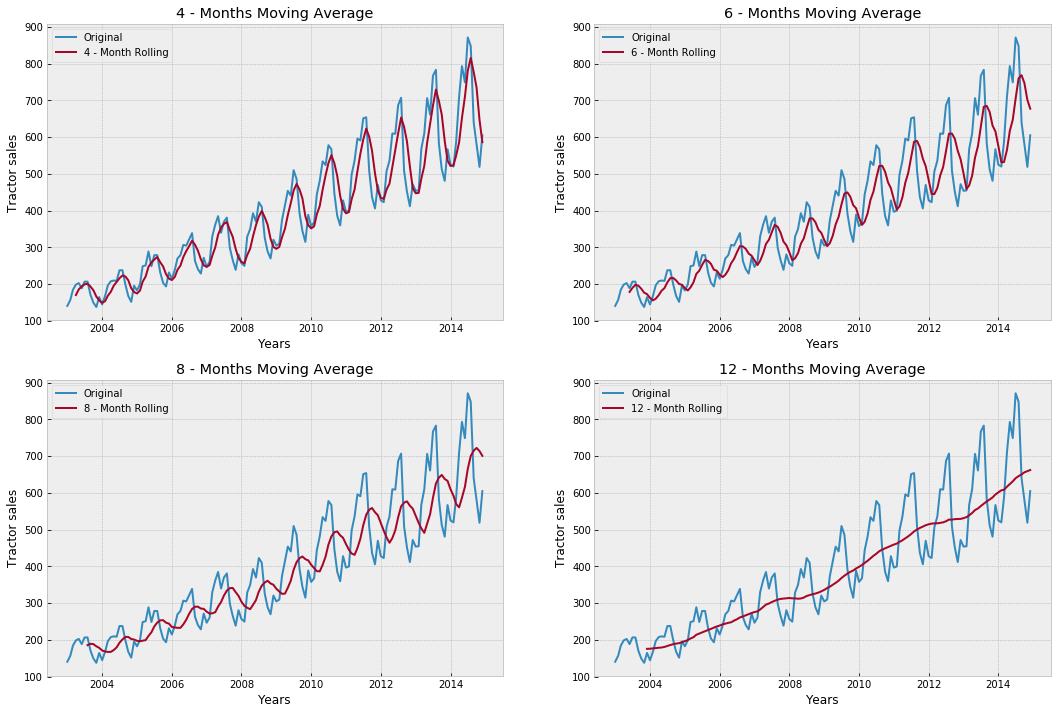

In [48]:
fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(18)
fig.set_figheight(12)

# rolling month window size its a (2 by 2) matrix - setting it so as to be like the (2 by 2) - subplots in figure
w=[[4,6],[8,12]]

for i in range(len(w)):
    for j in range(len(w[i])):
        #roll=rolling[i][j]
        axes[i][j].plot(sales_ts.index,sales_ts,label='Original')
        axes[i][j].plot(sales_ts.index,sales_ts.rolling(window=w[i][j]).mean(), label = (str(w[i][j]) + ' - Month Rolling'))
        #print(w[i][j])   # -- for debugging or checking
        #print(roll[0])   # -- for debugging or checking
        axes[i][j].set_xlabel('Years')
        axes[i][j].set_ylabel('Tractor sales')
        axes[i][j].set_title( str(w[i][j])+' - Months Moving Average')
        
        axes[i][j].legend(loc='best')  # if this line is commented or non-exsting...label also will not be visible
        

        

        

In [49]:
# a 12 month moving average produce a wrinkle free curve 

# Now , lets draw the Rolling mean and standard deviation on window of 12 months 

In [51]:
# Determining the Rolling statistics

rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

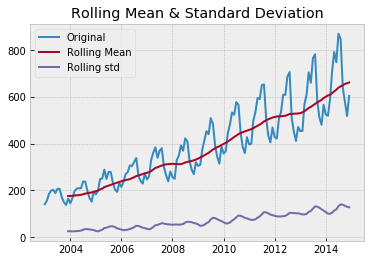

In [56]:
#plot rolling statistics

orig= plt.plot(sales_ts,label='Original')
mean=plt.plot(rolmean,label='Rolling Mean')
std1=plt.plot(rolstd,label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [57]:
# Lets perform the Dickey Fuller test on the timeseries and verify the null hypothesis that the TS is non-stationary

In [145]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')

dftest=adfuller(sales_ts,autolag='AIC')
dftest


Results of Dickey Fuller Test:


(1.1088250591467377,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [146]:
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

In [147]:
dfoutput

Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
dtype: float64

In [148]:
dftest[4]

{'1%': -3.482087964046026,
 '5%': -2.8842185101614626,
 '10%': -2.578864381347275}

In [157]:
for key,value in dftest[4].items():
    dfoutput['Critical values (%s)' %key]=value
print(dfoutput)

Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical values (1%)            -3.482088
Critical values (5%)            -2.884219
Critical values (10%)           -2.578864
dtype: float64


In [158]:
# though the variaton in standard deviation is small , 
# rolling mean is clearly increasing with time and this is not a stationary series
# also the test statistic is way more than the critical values.

#also we while plotting the moving average over months that there is a MONTHLY PATTERN




In [159]:
# now lets decipher the seosonal component

In [160]:
# Seasonality - Time Series Decomposition

# we will see how the number of tractors sold vary a month on a month basis
# we will plot a stacked annual plot to observe the seasonality in our data



In [163]:
sales_data.head(5)

,Month,Year,Tractor-sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [181]:
monthly_sales_data=pd.pivot_table(sales_data,values='Tractor-sales',columns='Year',index='Month')

In [182]:
monthly_sales_data.head(5)

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525


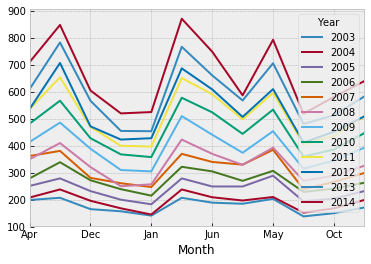

In [183]:
monthly_sales_data.plot()
plt.show()

In [184]:
## ^^^^^ as we can see the months are not sorted in proper order..we first rearrange the months and draw proper plot

In [185]:
monthly_sales_data=monthly_sales_data.reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [186]:
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


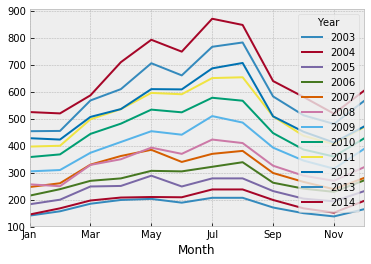

In [187]:
monthly_sales_data.plot()
plt.show()

In [ ]:
# inference1 : July and AUgust are the peak years for tractor sales and the varience and the mean value in july and august 

In [206]:
yearly_sales_data=pd.pivot_table(sales_data,values='Tractor-sales',columns='Month',index='Year')
yearly_sales_data.head(5)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [207]:
# here again the columns are not sorted in proper order..this time we re arrange colummns


In [209]:
yearly_sales_data.head(5)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [210]:
yearly_sales_data=yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [211]:
yearly_sales_data.head(5)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281


In [228]:
yearly_sales_data.index

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014],
           dtype='int64', name='Year')

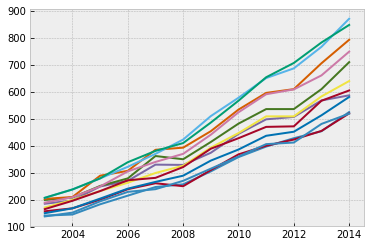

In [246]:
plt.plot(yearly_sales_data.index,yearly_sales_data.values[:,:])
#plt.legend(loc='best')
plt.show()

In [ ]:
# inference2 : The tractor sales have been increasing without fail each year 

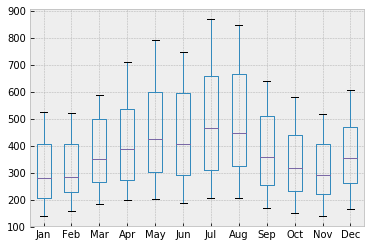

In [213]:
yearly_sales_data.boxplot()
plt.show()

In [247]:
# inference3: Mean and Varience value in july and august are also much higher than any of the other months
# (also check inference1 above)

In [248]:
# inference4 : We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing 
# trend in the beginning of the year and drops down towards the end of the year. 
# We can see a seasonal effect with a cycle of 12 months.